In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
%load_ext tensorboard
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/english_dataset.tsv', sep='\t')
df[:10]

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
5,hasoc_en_6,@kellymiller513 @TheRealOJ32 I hope you rememb...,NOT,NONE,NONE
6,hasoc_en_7,@ICC Latest design of #WC2019 trophy. #CWC2019...,NOT,NONE,NONE
7,hasoc_en_8,#ADOS #trendingnow #blacklivesmatter #justice ...,HOF,PRFN,TIN
8,hasoc_en_9,Thanks for your support! Wow 600k. Graffiti ha...,NOT,NONE,NONE
9,hasoc_en_10,By wearing the #BalidaanBadge over his gloves ...,NOT,NONE,NONE


In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/hasoc2019_en_test-2919.tsv', sep='\t')
df_test[:10]

,text_id,text,task_1,task_2,task_3
0,hasoc_en_902,West Bengal Doctor Crisis: Protesting doctors ...,NOT,NONE,NONE
1,hasoc_en_416,68.5 million people have been forced to leave ...,NOT,NONE,NONE
2,hasoc_en_207,"You came, you saw .... we will look after the ...",NOT,NONE,NONE
3,hasoc_en_595,We'll get Brexit delivered by October 31st. ...,NOT,NONE,NONE
4,hasoc_en_568,Fuck you. Go back to the dark ages you cow @IB...,HOF,PRFN,UNT
5,hasoc_en_953,Boris Johnson faces Supreme Court bid to make ...,NOT,NONE,NONE
6,hasoc_en_685,What about a refund for not serving Halala to ...,NOT,NONE,NONE
7,hasoc_en_672,"General election, DUP dumped out, Tory power w...",NOT,NONE,NONE
8,hasoc_en_746,#Repost free.wicked • • • • • • #freewicked ...,NOT,NONE,NONE
9,hasoc_en_527,Jesus Christ Christian News. Illuminati is now...,HOF,HATE,TIN


**Train data**

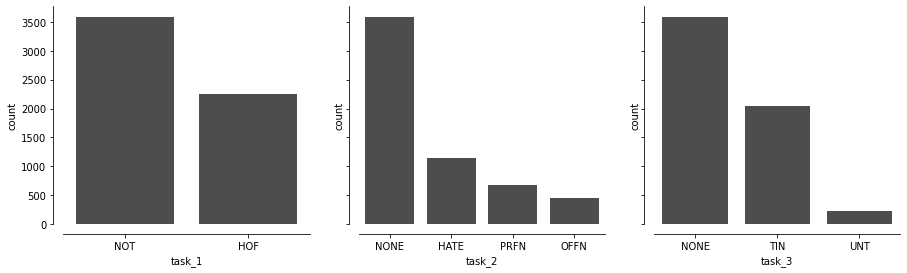

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
for axi, task in zip(ax.flatten(), ["task_1", "task_2", "task_3"]):
    sns.countplot(df[task], ax=axi, color="0.3")
sns.despine(offset=10)

In [ ]:
l=df['task_1'].value_counts()
print("the total dataset size:",len(df),'\n',l)

the total dataset size: 5852 
 NOT    3591
HOF    2261
Name: task_1, dtype: int64


In [ ]:
l=df['task_2'].value_counts()
print("the total dataset size:",len(df),'\n',l)

the total dataset size: 5852 
 NONE    3591
HATE    1143
PRFN     667
OFFN     451
Name: task_2, dtype: int64


In [ ]:
l=df['task_3'].value_counts()
print("the total dataset size:",len(df),'\n',l)

the total dataset size: 5852 
 NONE    3591
TIN     2041
UNT      220
Name: task_3, dtype: int64


**Test data**

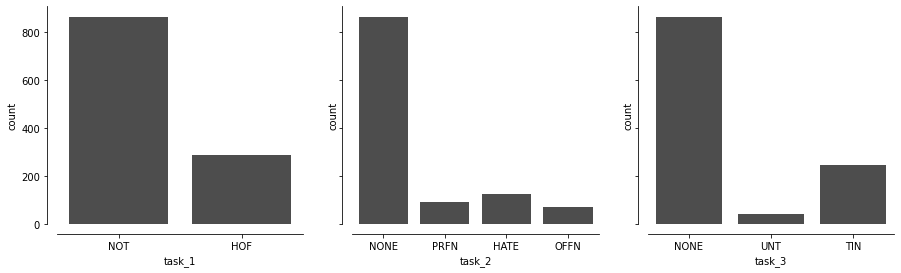

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
for axi, task in zip(ax.flatten(), ["task_1", "task_2", "task_3"]):
    sns.countplot(df_test[task], ax=axi, color="0.3")
sns.despine(offset=10)

In [ ]:
l=df_test['task_1'].value_counts()
print("the total dataset size:",len(df_test),'\n',l)

the total dataset size: 1153 
 NOT    865
HOF    288
Name: task_1, dtype: int64


In [ ]:
l=df_test['task_2'].value_counts()
print("the total dataset size:",len(df_test),'\n',l)

the total dataset size: 1153 
 NONE    865
HATE    124
PRFN     93
OFFN     71
Name: task_2, dtype: int64


In [ ]:
l=df['task_3'].value_counts()
print("the total dataset size:",len(df),'\n',l)

the total dataset size: 5852 
 NONE    3591
TIN     2041
UNT      220
Name: task_3, dtype: int64


**TEXT CLEANING FUNCTION**

In [ ]:
def clean_text(x):
  x = x.lower()  #converts into lower case
  x = re.sub(r'[^\w\s]','',x).split()
  list_ = []
  for i in x :
    if len(i)>2 and i not in stop_words: #remove stop words
      list_.append(i)
  x = ' '.join(list_)
  return x

**USING FASTTEXT EMBEDDING**

In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 2.5MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3016369 sha256=50334ad030dfb8dc37f2be8e26113b0e650ab21819c8b7a58a2e8138ab12e220
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
! wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

--2020-04-29 15:34:30--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  31.9MB/s    in 2m 40s  

2020-04-29 15:37:11 (26.8 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
!gunzip cc.en.300.bin.gz

In [ ]:
model=fasttext.load_model("cc.en.300.bin")

**Preprocessing training and testing data for TASK-1**

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_1 = df
df_1 = df_1.fillna(0) 
classes = {}
classes['HOF'] = 1
classes['NOT'] = 0
df_1['text'] = df_1.text.apply(lambda x : clean_text(x))
df_1['class_'] = df_1.task_1.apply(lambda x : classes[x])

In [ ]:
df_1= df_1[df_1['text']!='']

In [ ]:
df_1['text'][:5]

0    dhonikeepstheglove watch sports minister kiren...
1    politico remember clearly individual1 admitted...
2    cricketworldcup guess would winner cwc19 team ...
3    corbyn politically intellectual borisjohnsonsh...
4    best teamindia another swimming competition su...
Name: text, dtype: object

In [ ]:
df_1 = df
df_1 = df_1.fillna(0) 
classes = {}
classes['HOF'] = 1
classes['NOT'] = 0
df_1['text'] = df_1.text.apply(lambda x : clean_text(x))
df_1['class_'] = df_1.task_1.apply(lambda x : classes[x])

In [ ]:
df_1_test= df_1_test[df_1_test['text']!='']

In [ ]:
df_1_test['text'][:5]

0    west bengal doctor crisis protesting doctors a...
1    685 million people forced leave homes read htt...
2                         came saw look fort good luck
3    well get brexit delivered october 31st help bu...
4    fuck back dark ages cow ibnliverealtime rapes ...
Name: text, dtype: object

**TASK-1 SCORES**

In [ ]:
X_train = np.array([model.get_sentence_vector(i) for i in df_1.text.to_list()])
y_train = np.array(df_1.class_.tolist())
X_test=np.array([model.get_sentence_vector(i) for i in df_1_test.text.to_list()])
y_test = np.array(df_1_test.class_.tolist())

In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = ['NOT' , 'HOF']))

              precision    recall  f1-score   support

         NOT       0.85      0.89      0.87       865
         HOF       0.61      0.54      0.57       288

    accuracy                           0.80      1153
   macro avg       0.73      0.71      0.72      1153
weighted avg       0.79      0.80      0.80      1153



**Preprocessing training and testing data for TASK-2**

In [ ]:
df_2=df[df["task_1"]=='HOF']
df_2.head()

,text_id,text,task_1,task_2,task_3
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
7,hasoc_en_8,#ADOS #trendingnow #blacklivesmatter #justice ...,HOF,PRFN,TIN
11,hasoc_en_12,I don’t know how much more I can take! 45 is a...,HOF,HATE,TIN
15,hasoc_en_16,Good work @ICC keep going just destroy the who...,HOF,PRFN,TIN
23,hasoc_en_24,#ShameOnICC 1. ICC on Dhoni's gloves ...,HOF,HATE,TIN


In [ ]:
df_2 = df_2.fillna(0) 
classes = {}
classes['HATE'] = 0
classes['PRFN'] = 1
classes['OFFN'] = 2
df_2['text'] = df_2.text.apply(lambda x : clean_text(x))
df_2['class_'] = df_2.task_2.apply(lambda x : classes[x])

In [ ]:
df_2= df_2[df_2['text']!='']
df_2['text'][:5]

1     politico remember clearly individual1 admitted...
7     ados trendingnow blacklivesmatter justice fuck...
11    dont know much take compulsive liar trump30hou...
15    good work icc keep going destroy whole fucking...
23    shameonicc icc dhonis gloves 2icc planning wor...
Name: text, dtype: object

In [ ]:
df_2_test=df_test[df_test["task_1"]=='HOF']
df_2_test.head()

,text_id,text,task_1,task_2,task_3
4,hasoc_en_568,Fuck you. Go back to the dark ages you cow @IB...,HOF,PRFN,UNT
9,hasoc_en_527,Jesus Christ Christian News. Illuminati is now...,HOF,HATE,TIN
10,hasoc_en_137,Even true Muslims are not supporting zakir...t...,HOF,PRFN,TIN
11,hasoc_en_606,"'In Kerala, it's all halal'. Of course, sic...",HOF,HATE,TIN
12,hasoc_en_246,Look sweetie it’s simple- as a Jain if I ask f...,HOF,PRFN,TIN


In [ ]:
df_2_test = df_2_test.fillna(0) 
classes = {}
classes['HATE'] = 0
classes['PRFN'] = 1
classes['OFFN'] = 2
df_2_test['text'] = df_2_test.text.apply(lambda x : clean_text(x))
df_2_test['class_'] = df_2_test.task_2.apply(lambda x : classes[x])

In [ ]:
df_2_test= df_2_test[df_2_test['text']!='']
df_2_test['text'][:5]

4     fuck back dark ages cow ibnliverealtime rapes ...
9     jesus christ christian news illuminati changin...
10    even true muslims supporting zakirthey knkmow ...
11    kerala halal course sickular bastion serve por...
12    look sweetie simple jain ask veg food get non ...
Name: text, dtype: object

**TASK-2 SCORES**

In [ ]:
X_2_train = np.array([model.get_sentence_vector(i) for i in df_2.text.to_list()])
y_2_train = np.array(df_2.class_.tolist())
X_2_test=np.array([model.get_sentence_vector(i) for i in df_2_test.text.to_list()])
y_2_test = np.array(df_2_test.class_.tolist())

In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_2_train, y_2_train)
predicted = clf.predict(X_2_test)
print(classification_report(y_2_test , predicted , target_names = ['HATE' , 'PRFN' , 'OFFN']))

              precision    recall  f1-score   support

        HATE       0.53      0.94      0.68       124
        PRFN       0.59      0.44      0.51        93
        OFFN       1.00      0.01      0.03        71

    accuracy                           0.55       288
   macro avg       0.71      0.46      0.40       288
weighted avg       0.67      0.55      0.46       288



**Preprocessing training and testing data for TASK-3**

In [ ]:
df_3=df[df["task_1"]=='HOF']
df_3.head()

,text_id,text,task_1,task_2,task_3
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
7,hasoc_en_8,#ADOS #trendingnow #blacklivesmatter #justice ...,HOF,PRFN,TIN
11,hasoc_en_12,I don’t know how much more I can take! 45 is a...,HOF,HATE,TIN
15,hasoc_en_16,Good work @ICC keep going just destroy the who...,HOF,PRFN,TIN
23,hasoc_en_24,#ShameOnICC 1. ICC on Dhoni's gloves ...,HOF,HATE,TIN


In [ ]:
df_3 = df_3.fillna(0) 
classes = {}
classes['TIN'] = 0
classes['UNT'] = 1
df_3['text'] = df_3.text.apply(lambda x : clean_text(x))
df_3['class_'] = df_3.task_3.apply(lambda x : classes[x])

In [ ]:
df_3= df_3[df_3['text']!='']
df_3['text'][:5]

1     politico remember clearly individual1 admitted...
7     ados trendingnow blacklivesmatter justice fuck...
11    dont know much take compulsive liar trump30hou...
15    good work icc keep going destroy whole fucking...
23    shameonicc icc dhonis gloves 2icc planning wor...
Name: text, dtype: object

In [ ]:
df_3_test=df_test[df_test["task_1"]=='HOF']
df_3_test.head()

,text_id,text,task_1,task_2,task_3
4,hasoc_en_568,Fuck you. Go back to the dark ages you cow @IB...,HOF,PRFN,UNT
9,hasoc_en_527,Jesus Christ Christian News. Illuminati is now...,HOF,HATE,TIN
10,hasoc_en_137,Even true Muslims are not supporting zakir...t...,HOF,PRFN,TIN
11,hasoc_en_606,"'In Kerala, it's all halal'. Of course, sic...",HOF,HATE,TIN
12,hasoc_en_246,Look sweetie it’s simple- as a Jain if I ask f...,HOF,PRFN,TIN


In [ ]:
df_3_test = df_3_test.fillna(0) 
classes = {}
classes['TIN'] = 0
classes['UNT'] = 1
df_3_test['text'] = df_3_test.text.apply(lambda x : clean_text(x))
df_3_test['class_'] = df_3_test.task_3.apply(lambda x : classes[x])

In [ ]:
df_3_test= df_3_test[df_3_test['text']!='']
df_3_test['text'][:5]

4     fuck back dark ages cow ibnliverealtime rapes ...
9     jesus christ christian news illuminati changin...
10    even true muslims supporting zakirthey knkmow ...
11    kerala halal course sickular bastion serve por...
12    look sweetie simple jain ask veg food get non ...
Name: text, dtype: object

**TASK-3 SCORES**

In [ ]:
X_3_train = np.array([model.get_sentence_vector(i) for i in df_3.text.to_list()])
y_3_train = np.array(df_3.class_.tolist())
X_3_test=np.array([model.get_sentence_vector(i) for i in df_3_test.text.to_list()])
y_3_test = np.array(df_3_test.class_.tolist())

In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_3_train, y_3_train)
predicted = clf.predict(X_3_test)
print(classification_report(y_3_test , predicted , target_names = ['TIN' , 'UNT']))

              precision    recall  f1-score   support

         TIN       0.85      1.00      0.92       245
         UNT       0.00      0.00      0.00        43

    accuracy                           0.85       288
   macro avg       0.43      0.50      0.46       288
weighted avg       0.72      0.85      0.78       288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**USING TF-IDF METHOD**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()

**TASK-1 SCORES**

In [ ]:
df_1_text=df_1.append(df_1_test)
df_1_text= df_1_text[df_1_text['text']!='']

In [ ]:
X_1 = vector.fit_transform(df_1_text.text.values.astype('U')).toarray()

In [ ]:
len(df_1)

5851

In [ ]:
x_1_train=X_1[:5851]
x_1_test=X_1[5851:]
y_1_train = np.array(df_1.class_.tolist())
y_1_test = np.array(df_1_test.class_.tolist())

In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_1_train, y_1_train)
predicted = clf.predict(x_1_test)
print(classification_report(y_1_test , predicted , target_names = ['NOT' , 'HOF']))

              precision    recall  f1-score   support

         NOT       0.83      0.92      0.87       865
         HOF       0.64      0.43      0.51       288

    accuracy                           0.80      1153
   macro avg       0.73      0.67      0.69      1153
weighted avg       0.78      0.80      0.78      1153



**TASK-2 SCORES**

In [ ]:
df_2_text=df_2.append(df_2_test)
df_2_text= df_2_text[df_2_text['text']!='']

In [ ]:
X_2 = vector.fit_transform(df_2_text.text.values.astype('U')).toarray()

In [ ]:
len(df_2)

2261

In [ ]:
x_2_train=X_2[:2261]
x_2_test=X_2[2261:]
y_2_train = np.array(df_2.class_.tolist())
y_2_test = np.array(df_2_test.class_.tolist())

In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_2_train, y_2_train)
predicted = clf.predict(x_2_test)
print(classification_report(y_2_test , predicted , target_names = ['HATE' , 'PRFN' , 'OFFN']))

              precision    recall  f1-score   support

        HATE       0.55      0.93      0.69       124
        PRFN       0.64      0.53      0.58        93
        OFFN       0.00      0.00      0.00        71

    accuracy                           0.57       288
   macro avg       0.39      0.48      0.42       288
weighted avg       0.44      0.57      0.48       288



**TASK-3 SCORES**

In [ ]:
df_3_text=df_3.append(df_3_test)
df_3_text= df_3_text[df_3_text['text']!='']

In [ ]:
X_3 = vector.fit_transform(df_3_text.text.values.astype('U')).toarray()

In [ ]:
len(df_3)

2261

In [ ]:
x_3_train=X_3[:2261]
x_3_test=X_3[2261:]
y_3_train = np.array(df_3.class_.tolist())
y_3_test = np.array(df_3_test.class_.tolist())

In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_3_train, y_3_train)
predicted = clf.predict(x_3_test)
print(classification_report(y_3_test , predicted , target_names = ['TIN' , 'UNT']))

              precision    recall  f1-score   support

         TIN       0.85      1.00      0.92       245
         UNT       0.00      0.00      0.00        43

    accuracy                           0.85       288
   macro avg       0.43      0.50      0.46       288
weighted avg       0.72      0.85      0.78       288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
